In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 M

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv("/content/WFH_WFO_dataset.csv")

In [5]:
df

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,Nandini,32,Engineer,Female,Yes,Yes,Yes,Yes,Yes,CALMER,4,1,5,Yes,3,3,Not sure,1
203,204,Matt,52,Business,Male,Yes,Yes,Yes,Yes,Yes,CALMER,4,4,4,Yes,5,3,No,1
204,205,Rithik,22,Marketing,Male,Yes,No,Yes,Yes,No,STRESSED,4,4,4,No,4,3,Not sure,0
205,206,Radha,25,Marketing,Female,No,Yes,Yes,No,No,STRESSED,5,3,5,Yes,1,3,No,0


Data Exploration and Preprocessing

In [6]:
df.describe()

,ID,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,104.000000,29.666667,3.086957,3.101449,3.623188,3.043478,3.521739,0.405797
std,59.899917,8.506993,1.089301,1.255801,0.996617,1.247539,1.004002,0.492236
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,52.500000,25.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,104.000000,26.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,155.500000,29.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,207.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           207 non-null    int64 
 1   Name                         207 non-null    object
 2   Age                          207 non-null    int64 
 3   Occupation                   207 non-null    object
 4   Gender                       207 non-null    object
 5   Same_ofiice_home_location    207 non-null    object
 6   kids                         207 non-null    object
 7   RM_save_money                207 non-null    object
 8   RM_quality_time              207 non-null    object
 9   RM_better_sleep              207 non-null    object
 10  calmer_stressed              207 non-null    object
 11  RM_professional_growth       207 non-null    int64 
 12  RM_lazy                      207 non-null    int64 
 13  RM_productive                207 no

In [8]:
#Count of Total NULL values in entire dataframe
df.isna().sum().sum()

0

In [9]:
df.shape

(207, 19)

In [10]:
#number of rows in dataframe
len(df)

207

In [11]:
#number of columns in dataframe
len(df.columns)

19

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(207, 19)

In [14]:
df.drop(['ID','Name'], inplace=True, axis=1)

In [15]:
df.shape

(207, 17)

**VISUALIZATION**

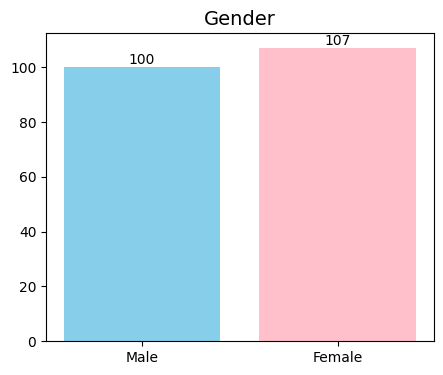

In [16]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(5,4)) 
plt.title('Gender', fontsize=14)
x = ['Male', 'Female']
y = [(df['Gender']=='Male').sum(), (df['Gender']=='Female').sum()]
plt.bar(x, y, color=['skyblue', 'pink'])
 
for index, value in enumerate(y):
    plt.text(index, value,
             str(value),
             ha='center',
             va='bottom')
 
plt.show()

>We have a count of 107 Females and 100 Males

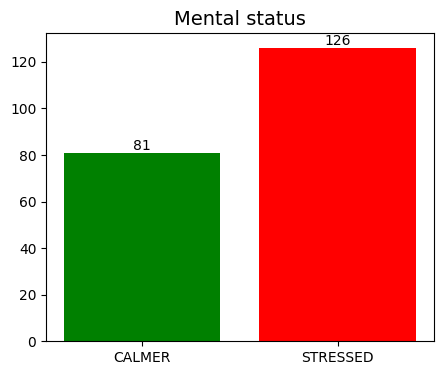

In [17]:
#bar plot for calmer_stressed column

plt.subplots(figsize=(5, 4)) 
x = ['CALMER', 'STRESSED']
plt.title('Mental status', fontsize=14)
y = [(df['calmer_stressed']=='CALMER').sum(), (df['calmer_stressed']=='STRESSED').sum()]
plt.bar(x,y, color=['green', 'red'])

for index, value in enumerate(y):
    plt.text(index, value,
             str(value),
             ha='center',
             va='bottom')
 
plt.show()

>We can see that remote working has caused increase in stress level in most of the  people

In [18]:
#get unique values in Occupation Column
occ= df.Occupation.unique()
occ

array(['Tutor', 'HR', 'Engineer', 'Recruiter', 'Business', 'Marketing ',
       'Manager'], dtype=object)

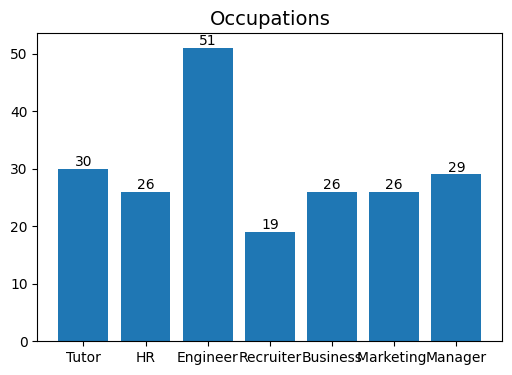

In [19]:
plt.subplots(figsize=(6, 4)) 
a=[]
b=[]
plt.title('Occupations', fontsize=14)
for i in occ:
  a.append(i)
  b.append((df['Occupation']==i).sum())

plt.bar(a,b, width=0.8)

for index, value in enumerate(b):
    plt.text(index, value,
             str(value),
             ha='center',
             va='bottom')
plt.show()

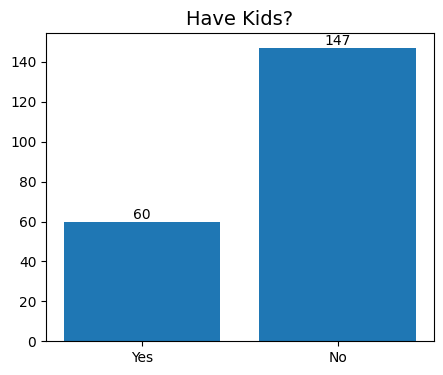

In [20]:
#bar plot for kids column

plt.subplots(figsize=(5, 4)) 
x = ['Yes', 'No']
plt.title('Have Kids?', fontsize=14)
y = [(df['kids']=='Yes').sum(), (df['kids']=='No').sum()]
plt.bar(x,y)
 
for index, value in enumerate(y):
    plt.text(index, value,
             str(value),
             ha='center',
             va='bottom')
 
plt.show()

>Majority of the people in our data set does not have kids

In [21]:
pro= df.RM_productive.unique()
pro

array([5, 2, 4, 3, 1])

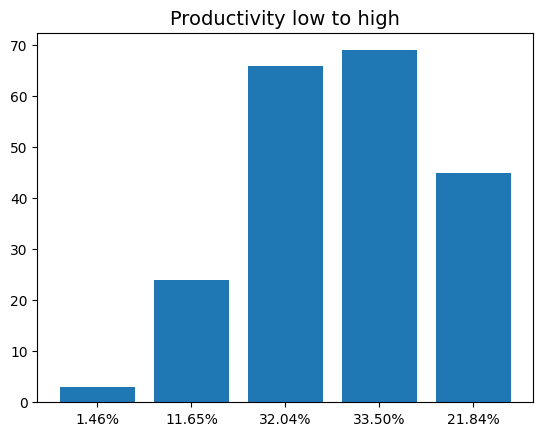

In [22]:
#bar plot for percentage of members find working remotely productive
a=[]
b=[]
pro.sort()
for i in pro:
  x= (((df['RM_productive']==i).sum())/206)*100
  a.append(str("{0:.2f}".format(x))+'%')
  b.append((df['RM_productive']==i).sum())
plt.title('Productivity low to high', fontsize=14)
plt.bar(a,b)
plt.show()

>Most people feel that WFH has made them more productive (Rank:4)

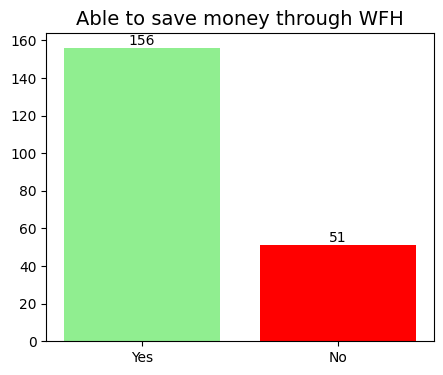

In [23]:
#bar plot for RM_Save_money column

plt.subplots(figsize=(5, 4)) 
x = ['Yes', 'No']
plt.title('Able to save money through WFH', fontsize=14)
y = [(df['RM_save_money']=='Yes').sum(), (df['RM_save_money']=='No').sum()]
plt.bar(x,y,color=['lightgreen', 'red'])
 
for index, value in enumerate(y):
    plt.text(index, value,
             str(value),
             ha='center',
             va='bottom')
 
plt.show()

>Larger proportion of people believe that they are able to save money through WFH

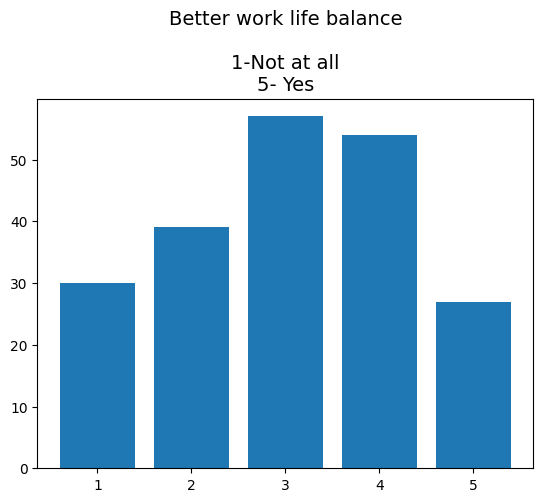

In [24]:
#bar plot for count of employees able to balance the work remotely
wlb= df.RM_better_work_life_balance.unique()

a=[]
b=[]
wlb.sort()
for i in wlb:
  x= (((df['RM_better_work_life_balance']==i).sum())/206)*100
  a.append(i)
  b.append((df['RM_better_work_life_balance']==i).sum())
plt.title("Better work life balance\n\n1-Not at all\n5- Yes", fontsize=14)
plt.bar(a,b)
plt.show()

**FINDING CATEGORICAL COLUMNS**


In [25]:
cat = df.select_dtypes(include=['object']).copy()

In [26]:
cc= cat.columns

In [27]:
cc

Index(['Occupation', 'Gender', 'Same_ofiice_home_location', 'kids',
       'RM_save_money', 'RM_quality_time', 'RM_better_sleep',
       'calmer_stressed', 'digital_connect_sufficient',
       'RM_job_opportunities'],
      dtype='object')

**CONVERSION OF CATEGORICAL TO NUMERIC**


In [28]:
le = preprocessing.LabelEncoder()
for i in cc:
  df[i]=le.fit_transform(df[i])
  print(i, end="-   ")
  print(le.classes_)

Occupation-   ['Business' 'Engineer' 'HR' 'Manager' 'Marketing ' 'Recruiter' 'Tutor']
Gender-   ['Female' 'Male']
Same_ofiice_home_location-   ['No' 'Yes' 'yes']
kids-   ['No' 'Yes']
RM_save_money-   ['No' 'Yes']
RM_quality_time-   ['No' 'Yes']
RM_better_sleep-   ['No' 'Yes']
calmer_stressed-   ['CALMER' 'STRESSED']
digital_connect_sufficient-   ['No' 'Yes']
RM_job_opportunities-   ['No' 'Not sure' 'Yes']


In [29]:
df

,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,45,6,0,1,1,1,1,1,0,5,1,5,1,5,5,2,1
1,24,6,1,0,0,0,0,0,0,2,2,2,0,3,3,0,1
2,53,2,0,1,1,1,1,1,0,3,3,4,0,5,3,0,1
3,26,1,0,1,0,1,1,0,1,3,4,4,0,4,5,2,0
4,26,5,1,1,0,0,1,0,1,3,3,5,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,32,1,0,1,1,1,1,1,0,4,1,5,1,3,3,1,1
203,52,0,1,1,1,1,1,1,0,4,4,4,1,5,3,0,1
204,22,4,1,1,0,1,1,0,1,4,4,4,0,4,3,1,0
205,25,4,0,0,1,1,0,0,1,5,3,5,1,1,3,0,0


In [30]:
y = df.Target

In [31]:
y

0      1
1      1
2      1
3      0
4      1
      ..
202    1
203    1
204    0
205    0
206    0
Name: Target, Length: 207, dtype: int64

In [32]:
X = df.drop('Target',axis = 1)

In [33]:
X

,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities
0,45,6,0,1,1,1,1,1,0,5,1,5,1,5,5,2
1,24,6,1,0,0,0,0,0,0,2,2,2,0,3,3,0
2,53,2,0,1,1,1,1,1,0,3,3,4,0,5,3,0
3,26,1,0,1,0,1,1,0,1,3,4,4,0,4,5,2
4,26,5,1,1,0,0,1,0,1,3,3,5,1,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,32,1,0,1,1,1,1,1,0,4,1,5,1,3,3,1
203,52,0,1,1,1,1,1,1,0,4,4,4,1,5,3,0
204,22,4,1,1,0,1,1,0,1,4,4,4,0,4,3,1
205,25,4,0,0,1,1,0,0,1,5,3,5,1,1,3,0


**HEATMAP AND CORRELATION**

<Axes: >

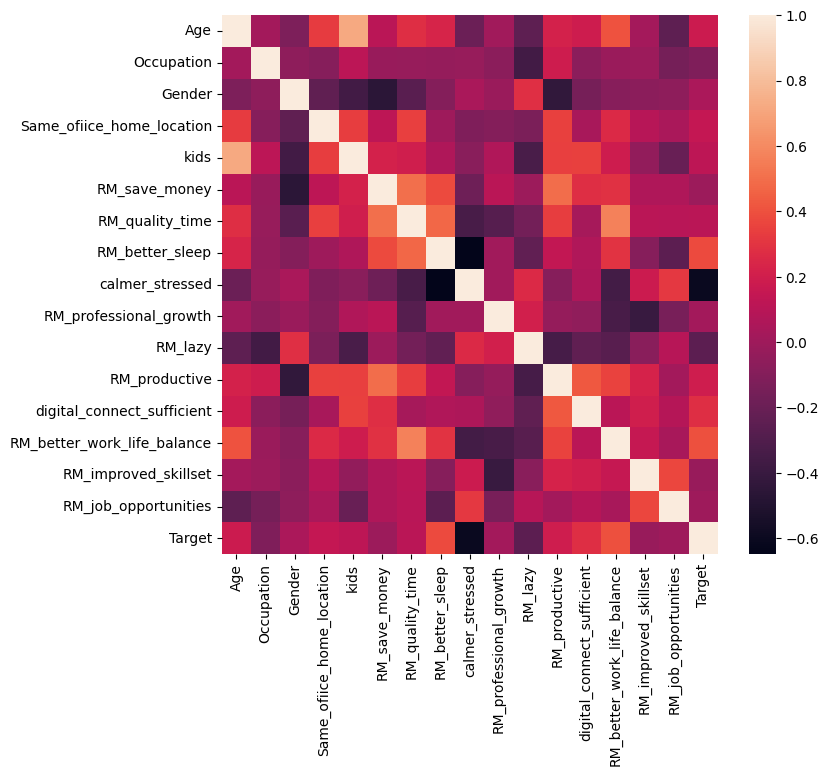

In [34]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr())

In [35]:
df.corr()

,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
Age,1.000000,0.019319,-0.124928,0.328243,0.722709,0.107007,0.276092,0.230026,-0.192456,0.009429,-0.244466,0.219294,0.183473,0.407092,0.022734,-0.246751,0.180846
Occupation,0.019319,1.000000,-0.057597,-0.090965,0.112534,-0.021432,-0.025878,-0.032331,-0.026549,-0.072415,-0.361130,0.183764,-0.073388,-0.013120,-0.009361,-0.157093,-0.117918
Gender,-0.124928,-0.057597,1.000000,-0.240898,-0.361928,-0.456834,-0.268282,-0.095767,0.042201,-0.015085,0.284404,-0.430943,-0.151458,-0.088149,-0.069244,-0.058107,0.047649
Same_ofiice_home_location,0.328243,-0.090965,-0.240898,1.000000,0.334216,0.118043,0.342901,-0.001382,-0.119151,-0.098677,-0.127622,0.346513,0.034676,0.254173,0.096354,0.044324,0.146418
kids,0.722709,0.112534,-0.361928,0.334216,1.000000,0.217026,0.198292,0.065150,-0.076836,0.066461,-0.332222,0.338529,0.347544,0.183021,-0.045760,-0.209345,0.122563
RM_save_money,0.107007,-0.021432,-0.456834,0.118043,0.217026,1.000000,0.500462,0.381198,-0.182776,0.107656,-0.007393,0.493716,0.278106,0.290229,0.062781,0.065865,-0.006949
RM_quality_time,0.276092,-0.025878,-0.268282,0.342901,0.198292,0.500462,1.000000,0.476091,-0.336143,-0.277587,-0.159466,0.335339,0.029134,0.563422,0.106995,0.100889,0.107770
RM_better_sleep,0.230026,-0.032331,-0.095767,-0.001382,0.065150,0.381198,0.476091,1.000000,-0.648906,0.008160,-0.235943,0.137184,0.068471,0.296203,-0.092329,-0.253084,0.380943
calmer_stressed,-0.192456,-0.026549,0.042201,-0.119151,-0.076836,-0.182776,-0.336143,-0.648906,1.000000,0.009505,0.254562,-0.094801,0.054278,-0.353767,0.180472,0.314373,-0.607373
RM_professional_growth,0.009429,-0.072415,-0.015085,-0.098677,0.066461,0.107656,-0.277587,0.008160,0.009505,1.000000,0.206439,-0.036744,-0.049916,-0.335006,-0.401215,-0.140415,0.015351


In [36]:
def correlate(ds,threshold):
  col_corr = set()
  cor_matrix = ds.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if abs(cor_matrix.iloc[i,j]) > threshold:
        col_corr.add(cor_matrix.columns[i])
  return col_corr

In [37]:
cor_features = correlate(df,0.9)
print(cor_features)
print(len(cor_features))

set()
0


In [38]:
df.drop(cor_features,axis =1,inplace = True)

In [39]:
df.shape

(207, 17)

**TRAIN TEST SPLIT**

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2
                                                    , random_state=0)

In [41]:
X_train.shape

(165, 16)

In [42]:
X_test.shape

(42, 16)

In [43]:
# X_train

In [44]:
# X_test

**STANDARDISATION**

In [45]:
Standardisation = preprocessing.StandardScaler()
xtrain = Standardisation.fit_transform(X_train)
xtest = Standardisation.fit_transform(X_test)

**SVC- SUPPORT VECTOR CLASSIFIER**

In [46]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(xtrain, y_train)

SVC()

In [47]:
y_pred = svc_model .predict(xtest)
print(confusion_matrix(y_test, y_pred))

[[24  3]
 [ 0 15]]


In [48]:
acc1= metrics.accuracy_score(y_test,y_pred)*100
print(acc1)
# acc1= int(acc1)

92.85714285714286


In [49]:
dframe=pd.DataFrame({'actual':y_test,'Predicted':y_pred})
dframe.tail(10)

,actual,Predicted
137,0,0
71,0,0
185,0,0
144,0,0
178,1,1
118,0,0
16,0,0
134,1,1
146,0,1
22,0,0


**KNN- K NEAREST NEIGHBOURS**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(xtrain, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred = classifier.predict(xtest)
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[22,  5],
       [ 2, 13]])

In [52]:
acc2= accuracy_score(y_test, y_pred)*100
print(acc2)
# acc2= int(acc2)

83.33333333333334


**DECISION TREE CLASSIFIER**

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier.fit(xtrain, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
y_pred = classifier.predict(xtest)

In [55]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
acc3= accuracy*100
print("Accuracy score:",acc3)
# acc3= int(acc3)

[[25  2]
 [ 0 15]]
Accuracy score: 95.23809523809523


In [56]:
# dframe=pd.DataFrame({'actual':y_test,'Predicted':y_pred})
# dframe.head(40)

**Logistic Regression**


In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, y_train)
lr_predict = lr.predict(xtest)
lr_acc_score = accuracy_score(y_test, lr_predict)
acc4= lr_acc_score*100
print("Accuracy of Logistic Regression:",acc4)
# acc4= int(acc4)

Accuracy of Logistic Regression: 88.09523809523809


In [58]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
print(lr_conf_matrix)

[[22  5]
 [ 0 15]]


<Axes: title={'center': 'Comparision of Models'}, xlabel='Model'>

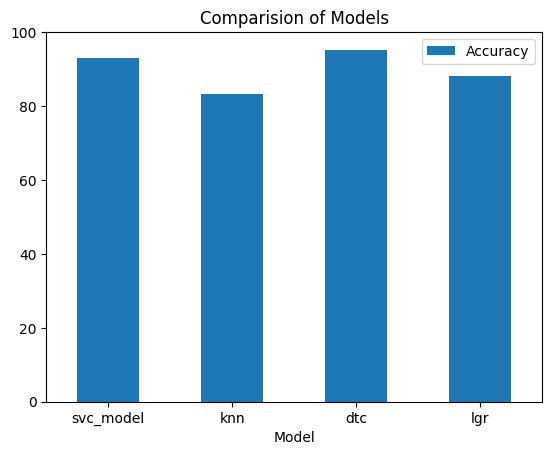

In [59]:
info = [['svc_model', 'knn', 'dtc', 'lgr'],[acc1,acc2,acc3,acc4]]
df = pd.DataFrame(columns=['Model', 'Accuracy'])
for i in range(4):
  df.loc[i] = [info[0][i],info[1][i]]
df.plot.bar(x="Model", y="Accuracy",title="Comparision of Models", rot = 0)

**Cross Validation using KFold**

In [60]:

from sklearn.model_selection import KFold

In [61]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
   


Fold:1, Train set: 165, Test set:42
Fold:2, Train set: 165, Test set:42
Fold:3, Train set: 166, Test set:41
Fold:4, Train set: 166, Test set:41
Fold:5, Train set: 166, Test set:41


In [62]:
df.shape


(4, 2)

**Cross Validation- SVC**

In [63]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_classifier, X, y, cv=kfold, scoring='accuracy')

# print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy score: {(scores.mean())*100:.2f}")

Mean accuracy score: 86.46


**Cross Validation - KNN**

In [64]:
knn = KNeighborsClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score=cross_val_score(knn,X,y,cv=kf, scoring='accuracy')
# print("Cross Validation Scores are {}".format(score))
print(f"Mean accuracy score: {(score.mean())*100:.2f}")

Mean accuracy score: 80.20


**Cross Validation- Decision Tree**

In [65]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dtc, X, y, cv=kfold, scoring='accuracy')

# print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy score: {(scores.mean())*100:.2f}")

Mean accuracy score: 98.07


**Cross Validation- Logistic regression**

In [66]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score=cross_val_score(lgr,X,y,cv=kf, scoring='accuracy')

# print("Cross Validation Scores are {}".format(score))
print(f"Mean accuracy score: {(score.mean())*100:.2f}")

Mean accuracy score: 88.85


In [67]:
# dframe=pd.DataFrame({'actual':y_test,'Predicted':y_pred})
# dframe.head(40)

**DEPLOYEMENT**

In [68]:
import gradio as gr
import pickle

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
def prediction(Age,Occupation,Gender,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance, RM_improved_skillset, RM_job_opportunities):
  x=np.array([Age,Occupation,Gender,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance, RM_improved_skillset, RM_job_opportunities])
  x =((x-X_train.mean())/(X_train.std()))
  outcome = svc_model.predict([x])
  if outcome==0:
    return "Work from office"
  else:
    return "Work from home"
output = gr.outputs.Textbox()
demo=gr.Interface(fn=prediction,inputs=["number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number"],outputs=output, title = "WFO vs WFH Prediction", 
                  description = """<center>
                                   <img src="https://media.licdn.com/dms/image/C5612AQEYR8XASgZiNQ/article-cover_image-shrink_720_1280/0/1590647828313?e=2147483647&v=beta&t=rpkBjww7FcFMw8nVp80INk7ngclD1XSRAp6sCExHyZM" style="max-width: 700px">
                                    </center><br>
                                    <b>Occupation :</b> Business= 0, Engineer= 1, HR= 2, Manager= 3, Marketing= 4, Recruiter= 5, Tutor= 6<br>
                                    <b>Gender :</b> Female = 0, Male = 1<br>
                                    <b>Calmer or stressed :</b> Calmer= 0, Stressed= 1<br>
                                    <b>RM_Job_Oppurtunities :</b> No= 0, Not sure= 1, Yes= 2<br>
                                    <b>RM_professional_growth :</b> 5-yes it's affecting me badly, 1- No it doesn't affect me<br>
                                    <b>RM_lazy :</b> (5-extremely lazy, 1-Nope, not lazy at all)<br>
                                    <b>RM_productive :</b> (1-not productive at all, 5-extremely productive)<br>
                                    <b>RM_better_work_life_balance :</b> (1-No not at all, 5-Yessssssss)<br>
                                    <b>RM_improved_skillset :</b> (skillset with respect to your work domain, 1:Not improved, 5:Improved drastically)<br>
                                    <b>Rest all :</b> No= 0, Yes= 1<br>""")
demo.launch(debug = False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>